## 1 Working with Matrices

#### (1) Orthogonal Matrix

In [784]:
import numpy as np
import matplotlib.pyplot as plt

In [785]:
np.set_printoptions(suppress=True) 
#to surpress very small numbers showing as non-zero in outputs
#(Stack Overflow, n.d.)

In [786]:
M = [[1/3, 2/3, 2/3],
     [2/3, 1/3, -2/3],
     [-2/3, 2/3, -1/3]]

In [787]:
#insert M into a numpy array
M = np.array(M)
print(M)
#confirm our matrix is square
print(M.shape)

[[ 0.33333333  0.66666667  0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]
 [-0.66666667  0.66666667 -0.33333333]]
(3, 3)


In [788]:
#Transpose M
MT = M.T
#Inverse M
MInv = np.linalg.inv(M)

In [789]:
#Test the matrix is orthogonal for thoroughness
MT@M

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

##### Vector Magnitude
All Columns when interpreted as Vectors have magnitude of 1, as shown below:

In [790]:
M_0 = np.linalg.norm(M[:,0]) #numpy function to find the length of the first column
M_1 = np.linalg.norm(M[:,1]) #as above for second
M_2 = np.linalg.norm(M[:,2]) #as above for third
print('Column 1 length: ',M_0)
print('Column 2 length: ',M_1)
print('Column 3 length: ',M_2)

Column 1 length:  1.0
Column 2 length:  1.0
Column 3 length:  1.0


##### Vectors Orthogonal
All Columns when interpreted as Vectors are orthogonal, as shown below:

In [791]:
#When the dot product of two vectors is zero they are perpendicular
dot_1 = round(np.dot(M[:,0],M[:,1]),10) #dot product of columns 1 and 2
                                        #Round added to dot_1 as e-17
dot_2 = np.dot(M[:,0],M[:,2]) #dot product of columns 1 and 3                                        
dot_3 = np.dot(M[:,1],M[:,2]) #dot product of columns 2 and 3

print(dot_1)
print(dot_2)
print(dot_3)
print('Are all Vectors perpendicular to each other:', dot_1==dot_2==dot_3==0)

0.0
0.0
0.0
Are all Vectors perpendicular to each other: True


##### Isometry


In [792]:
M_trans = M@M
print(M_trans)

[[ 0.11111111  0.88888889 -0.44444444]
 [ 0.88888889  0.11111111  0.44444444]
 [ 0.44444444 -0.44444444 -0.77777778]]


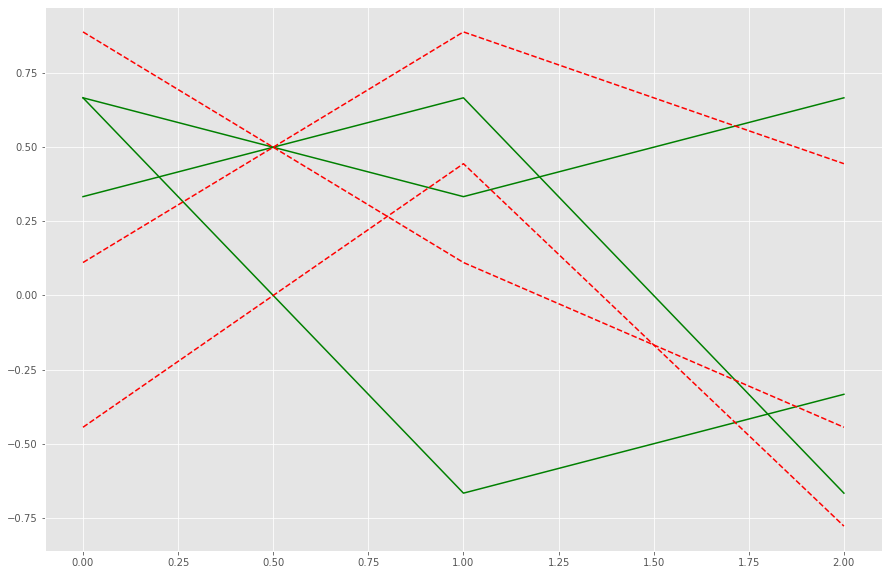

In [793]:
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use(['ggplot'])
plt.plot(M, 'g-')
plt.plot(M_trans, 'r--')
plt.show()

The plot of M and M_trans above shows that the angles between the vectors remain unchanged from comparison of the lines alone. However, we can also evaluate this using numpy as below.

In [794]:
#Calculate the Unit Vectors
m_uv_1 = ((M[:,0]) / (np.linalg.norm(M[:,0])))
print('Unit Vector 1: ',m_uv_1)
m_uv_2 = ((M[:,1]) / (np.linalg.norm(M[:,1])))
print('Unit Vector 2: ',m_uv_2)
m_uv_3 = ((M[:,2]) / (np.linalg.norm(M[:,2])))
print('Unit Vector 3: ',m_uv_3)

mt_uv_1 = ((M_trans[:,0]) / (np.linalg.norm(M_trans[:,0])))
print('Unit Vector 1: ',mt_uv_1)
mt_uv_2 = ((M_trans[:,1]) / (np.linalg.norm(M_trans[:,1])))
print('Unit Vector 2: ',mt_uv_2)
mt_uv_3 = ((M_trans[:,2]) / (np.linalg.norm(M_trans[:,2])))
print('Unit Vector 3: ',mt_uv_3)

Unit Vector 1:  [ 0.33333333  0.66666667 -0.66666667]
Unit Vector 2:  [0.66666667 0.33333333 0.66666667]
Unit Vector 3:  [ 0.66666667 -0.66666667 -0.33333333]
Unit Vector 1:  [0.11111111 0.88888889 0.44444444]
Unit Vector 2:  [ 0.88888889  0.11111111 -0.44444444]
Unit Vector 3:  [-0.44444444  0.44444444 -0.77777778]


In [795]:
#Calculate the angles between the unit Vectors
print('Angles between Vectors in M')
print('Vectors 1 and 2: ',np.arccos(np.clip(np.dot(m_uv_1, m_uv_2), -1.0, 1.0)))
print('Vectors 1 and 3: ',np.arccos(np.clip(np.dot(m_uv_1, m_uv_3), -1.0, 1.0)))
print('Vectors 2 and 3: ',np.arccos(np.clip(np.dot(m_uv_2, m_uv_3), -1.0, 1.0)))
print('------------')
print('')
print('Angles between Vectors in M_trans')
print('Vectors 1 and 2: ',np.arccos(np.clip(np.dot(mt_uv_1, mt_uv_2), -1.0, 1.0)))
print('Vectors 1 and 3: ',np.arccos(np.clip(np.dot(mt_uv_1, mt_uv_3), -1.0, 1.0)))
print('Vectors 2 and 3: ',np.arccos(np.clip(np.dot(mt_uv_2, mt_uv_3), -1.0, 1.0)))

Angles between Vectors in M
Vectors 1 and 2:  1.5707963267948966
Vectors 1 and 3:  1.5707963267948966
Vectors 2 and 3:  1.5707963267948966
------------

Angles between Vectors in M_trans
Vectors 1 and 2:  1.5707963267948966
Vectors 1 and 3:  1.5707963267948968
Vectors 2 and 3:  1.5707963267948966


The code above also demonstrates that these angles are preserved

In [796]:
#Check the magnitude of the vectors within M and M_trans
for i in range (0,3):
    print('Magnitude of M',i,' : ',np.linalg.norm(M[:,i]))
    print('Magnitude of M_trans',i,' : ',np.linalg.norm(M_trans[:,i]))
    print('---------')
    print('')

Magnitude of M 0  :  1.0
Magnitude of M_trans 0  :  1.0
---------

Magnitude of M 1  :  1.0
Magnitude of M_trans 1  :  1.0
---------

Magnitude of M 2  :  1.0
Magnitude of M_trans 2  :  1.0
---------



We can see from the above code and output that the magnitudes of the vectors remain the same when M is transformed by M.

#### (2) 2x2 Matrices

In [797]:
#Create a large number of 2x2 matrices and store them in "d" for later use
d={}
for i in range(0,100):
    #Randomly generated from -10,10 values for each element
    d[i] = np.array([[np.random.randint(-10,11),np.random.randint(-10,11)],
                  [np.random.randint(-10,11),np.random.randint(-10,11)]])
    


##### (a) Eigenvalues

In [798]:
for i in range(0,100):
    print('Values for matrix: ',i)
    print(d[i])
    print('Eigenvalues: ',np.linalg.eigvals(d[i]))
    print('Trace: ',np.trace(d[i]))
    print('Determinant: ',np.linalg.det(d[i]))
    print('Sum of Eigenvalues: ', np.linalg.eigvals(d[i])[0]+np.linalg.eigvals(d[i])[1])
    print('Product of Eigenvalues: ', np.linalg.eigvals(d[i])[0]*np.linalg.eigvals(d[i])[1])
    print('-------------------')
    print('')


Values for matrix:  0
[[ 5 -5]
 [-9  1]]
Eigenvalues:  [10. -4.]
Trace:  6
Determinant:  -40.000000000000014
Sum of Eigenvalues:  6.0
Product of Eigenvalues:  -40.0
-------------------

Values for matrix:  1
[[-9 -5]
 [-8 -4]]
Eigenvalues:  [-13.30073525   0.30073525]
Trace:  -13
Determinant:  -3.999999999999999
Sum of Eigenvalues:  -13.0
Product of Eigenvalues:  -4.000000000000003
-------------------

Values for matrix:  2
[[-7  0]
 [ 7 -7]]
Eigenvalues:  [-7. -7.]
Trace:  -14
Determinant:  48.99999999999999
Sum of Eigenvalues:  -14.0
Product of Eigenvalues:  49.0
-------------------

Values for matrix:  3
[[-6  5]
 [-6 -8]]
Eigenvalues:  [-7.+5.38516481j -7.-5.38516481j]
Trace:  -14
Determinant:  78.0
Sum of Eigenvalues:  (-13.999999999999998+0j)
Product of Eigenvalues:  (77.99999999999999+0j)
-------------------

Values for matrix:  4
[[-5 -8]
 [-4 10]]
Eigenvalues:  [-6.89414711 11.89414711]
Trace:  5
Determinant:  -82.00000000000001
Sum of Eigenvalues:  4.999999999999998
Product o

From the values output by the code above we can see that the sum of the eigenvalues for a given matrix are equal to its trace. We can also see that the determinant is the product of the eigenvalues for a given matrix. These calculations have been added to the code for ease.

##### (b) Symmetric

In [799]:
#Find all the symmetric matrices produced by our random matrix creation
#Check the eigenvalues of these matrices
#Then test is they are real
for i in range(0,100):
    if (d[i]==d[i].T).all():
        print('Matrix Number: ',i)
        print(d[i])
        print('Eigenvalues: ',np.linalg.eigvals(d[i]))
        print('First Eigenvalue is real?: ',np.isreal(np.linalg.eigvals(d[i])[0]))
        print('Second Eigenvalue is real?: ',np.isreal(np.linalg.eigvals(d[i])[1]))
        print('------------')
        print('')

Matrix Number:  6
[[ -5 -10]
 [-10  -6]]
Eigenvalues:  [  4.5124922 -15.5124922]
First Eigenvalue is real?:  True
Second Eigenvalue is real?:  True
------------

Matrix Number:  7
[[-7 -7]
 [-7  1]]
Eigenvalues:  [-11.06225775   5.06225775]
First Eigenvalue is real?:  True
Second Eigenvalue is real?:  True
------------

Matrix Number:  36
[[ 6  3]
 [ 3 -4]]
Eigenvalues:  [ 6.83095189 -4.83095189]
First Eigenvalue is real?:  True
Second Eigenvalue is real?:  True
------------

Matrix Number:  96
[[-4  1]
 [ 1  7]]
Eigenvalues:  [-4.09016994  7.09016994]
First Eigenvalue is real?:  True
Second Eigenvalue is real?:  True
------------

Matrix Number:  99
[[-4  7]
 [ 7 -5]]
Eigenvalues:  [  2.51783442 -11.51783442]
First Eigenvalue is real?:  True
Second Eigenvalue is real?:  True
------------



As we can see from the output above, the eigenvalues of these symmetric matrices are real.

##### (c) $A^2 -tA +dI$

In [800]:
A = d[5]
print('Matrix A')
print(A)
print('---------')
print('')

trace = np.trace(d[1])
print('Trace of A')
print(trace)
print('---------')
print('')

det = np.linalg.det(d[1])
print('Det of A')
print(det)
print('---------')
print('')

I = np.identity(2)
print('Identity Matrix')
print(I)
print('---------')
print('')

print('A² - tA + dI')
print(np.square(A) - np.dot(trace,A) + np.dot(det,I))

Matrix A
[[-7  1]
 [-4 -5]]
---------

Trace of A
-13
---------

Det of A
-3.999999999999999
---------

Identity Matrix
[[1. 0.]
 [0. 1.]]
---------

A² - tA + dI
[[-46.  14.]
 [-36. -44.]]


#### (3) Bivariate Normal Distribution

##### (a) Choosing mu and Sigma

In [801]:
#importing scipy for later use
import scipy.stats as stats
import scipy

In [802]:
#Setting the Mean Matrix
mean = [2,4]

#Setting the Covariance Matrix
#Making it symmetric as required
cov = [[5,-2],
       [-2,3]]

In [803]:
#Create the sample using numpy
sample = np.random.multivariate_normal(mean, cov,size=50)

In [804]:
print(sample[:5]) #check the top 5 rows

[[ 4.12686715 -0.03532693]
 [ 2.75786635  2.33357596]
 [ 4.77457016  2.68877735]
 [ 2.02275627  5.08274048]
 [ 8.52552427  0.12080272]]


In [805]:
#Calculating the sample mean and sample covariance
sample_means = np.mean(sample, axis=0) #axis = 0 to operate correctly
sample_cov = np.cov(sample.T) #Transpose of sample to operate correctly

print('Sample means')
print(sample_means)
print('---------')
print('')
print('Sample Covariance')
print(sample_cov)

Sample means
[2.13627881 3.67768047]
---------

Sample Covariance
[[ 4.97075028 -3.05970974]
 [-3.05970974  3.80012475]]


Comparing these to our original mean and covariance matrix we can see that the sample is approximating closely to our original values as we would expect, and with a larger sample size we would approximate more closely.

In [806]:
#Creating the mesh grid of the variable for plotting
X,Y = np.meshgrid(sample[:,0],sample[:,1])

In [807]:
#Calculating the height values (Z) and writing these to a matrix
Z = np.zeros(X.shape)
for row in range(X.shape[0]):
    for col in range(X.shape[1]):
        point = np.array([[ X[row,col] ],[ Y[row,col] ]])
        z = stats.multivariate_normal.pdf(point.flatten(),mean=sample_means.flatten(),cov=sample_cov)
        
        Z[row,col] = z

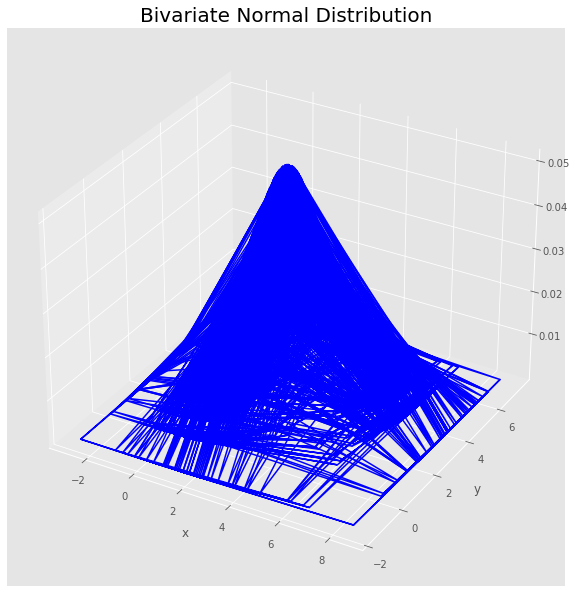

In [808]:
#Plotting the Normal Distribution of our variables
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X,Y,Z, color='b')
plt.title('Bivariate Normal Distribution', fontdict = {'size':20,'color':'black'})
plt.xlabel('x')
plt.ylabel('y')

plt.show()

I was unsure if the intention was to plot a scatter plot as below or if the question intended for the 3D normal plot to be produced, as such I've created a simple scatter plot of the two variables below in addition.

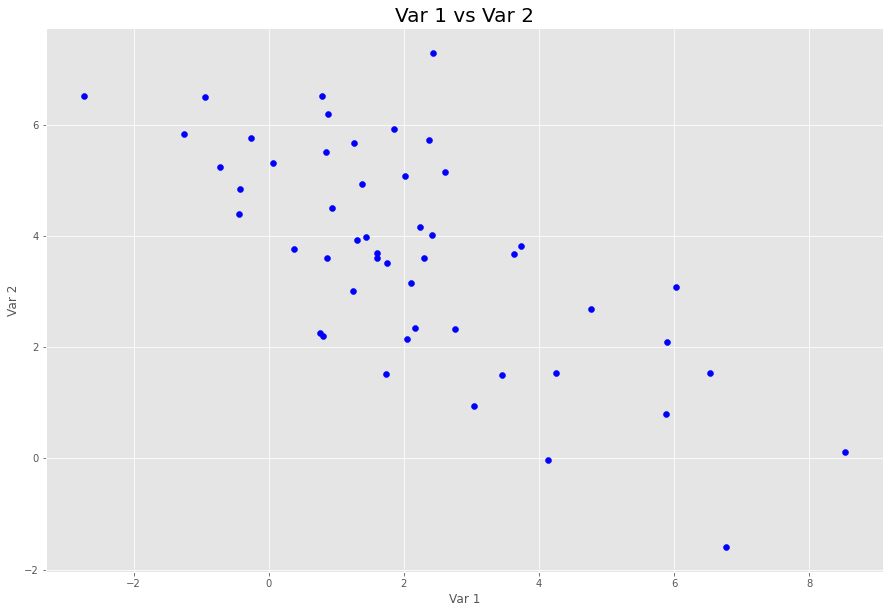

In [809]:
#Plot the samples in a scatter side by side
plt.title('Var 1 vs Var 2', fontdict = {'size':20,'color':'black'})
plt.scatter(sample[:,0],sample[:,1],color= 'b')

#label the axes
plt.xlabel('Var 1')
plt.ylabel('Var 2')

plt.show()

##### (b) Calculating XC and Correlation

In [810]:
#Calculating XC by subtracting the sample means from the sample taken
XC = []
XC_1 = sample[:,0] - sample_means[0]
XC_2 = sample[:,1] - sample_means[1]

XC = np.stack((XC_1,XC_2),axis=1) #np.stack used to join the columns together
print(XC[:5]) # print top 5 rows to check it has worked
#(www.w3schools.com, n.d.)

[[ 1.99058835 -3.71300741]
 [ 0.62158755 -1.34410451]
 [ 2.63829135 -0.98890312]
 [-0.11352254  1.40506001]
 [ 6.38924547 -3.55687775]]


In [811]:
print('C: ')
print(sample_cov)
print('--------')
print('')
print('XCᵀXC: ')
print(XC.T@XC)

C: 
[[ 4.97075028 -3.05970974]
 [-3.05970974  3.80012475]]
--------

XCᵀXC: 
[[ 243.56676374 -149.92577725]
 [-149.92577725  186.20611295]]


C (sample_cov) and the matrix procut XCᵀXC are related by a factor of approximately 49, which in this case is the number of observation less one (i.e. n-1)

In [812]:
R = np.corrcoef(sample.T) # transpose used again to ensure correct function
print('Correlation Matrix: ')
print(R)

Correlation Matrix: 
[[ 1.         -0.70399622]
 [-0.70399622  1.        ]]


In [813]:
ssqrt = np.sqrt(sample_cov)
#np.diag to select the diagonal elements
#np.diagflat to create a diagonal matrix from this
E = np.diagflat(np.diag(ssqrt)) 

#Creating the inverse of E for later
E_inv = np.linalg.inv(E)

#Set sample_cov to C for ease of reading later
C = sample_cov

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


E is the square roots of the sample variances (i.e. the standard deviations in a diagonal matrix).<br>
C is the covariance matrix of the samples (i.e. Var and CoVar of x,y).<br>
R is the Correlation Matrix of the variables from the sample.
<br><br>
Correlation is calculated by dividing the covariance by the product of the two variables' standard deviations:
Correlation = $\frac{cov(X,Y)}{σ_Xσ_Y}$



In [814]:
Vars = E[0,0]*E[1,1]

In [815]:
R_Calc = C/Vars
print(R_Calc)

[[ 1.1436998  -0.70399622]
 [-0.70399622  0.87435531]]


We can see that the array above shows the same correlations between the variables as our previously calculated R

##### (c) Diagonalise & Further Plots

In [816]:
#Print our covariance matrix C
print(C)

[[ 4.97075028 -3.05970974]
 [-3.05970974  3.80012475]]


In [817]:
#Obtain the eigenvalues and eigenvectors of C
eigvals_C, eigvecs_C = np.linalg.eig(C)
print('Eigen Values')
print(eigvals_C)
print(eigvecs_C)

Eigen Values
[7.50062848 1.27024656]
[[ 0.77067822  0.63722451]
 [-0.63722451  0.77067822]]


In [818]:
#Creating D from the eigenvalues of C
D = np.array([[eigvals_C[1],0],[0,eigvals_C[0]]])
print(D)

[[1.27024656 0.        ]
 [0.         7.50062848]]


In [819]:
#Creating P from the eigenvectors of C
P = np.array([eigvecs_C[:,1],eigvecs_C[:,0]])
print(P)

[[ 0.63722451  0.77067822]
 [ 0.77067822 -0.63722451]]


In [820]:
#Calculating the inverse of P
P_inv = np.linalg.inv(P)
print(P_inv)


[[ 0.63722451  0.77067822]
 [ 0.77067822 -0.63722451]]


In [821]:
#Calculating PDP-1
P@D@P_inv

array([[ 4.97075028, -3.05970974],
       [-3.05970974,  3.80012475]])

We can see the matches back to our covariance Matrix C as expected, thus we have performed this correctly

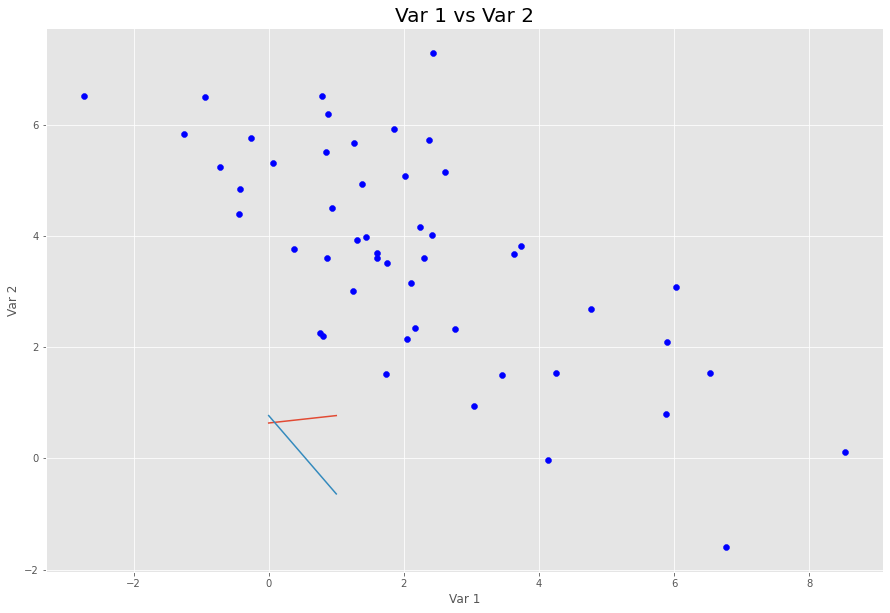

In [822]:
#Plot the samples in a scatter side by side
plt.title('Var 1 vs Var 2', fontdict = {'size':20,'color':'black'})
plt.scatter(sample[:,0],sample[:,1],color= 'b')
plt.plot(P)

#label the axes
plt.xlabel('Var 1')
plt.ylabel('Var 2')

plt.show()

Performing Matrix transformation of the sample by matrix P

In [823]:
#Create a new empty dict

sample_trans = []

#interacting through and calculating the transformed values
for i in range(sample.shape[0]):
    sample_trans.append(list(sample[i]@P))

#assigning the sample_transformations to an array
sample_trans = np.array(sample_trans)

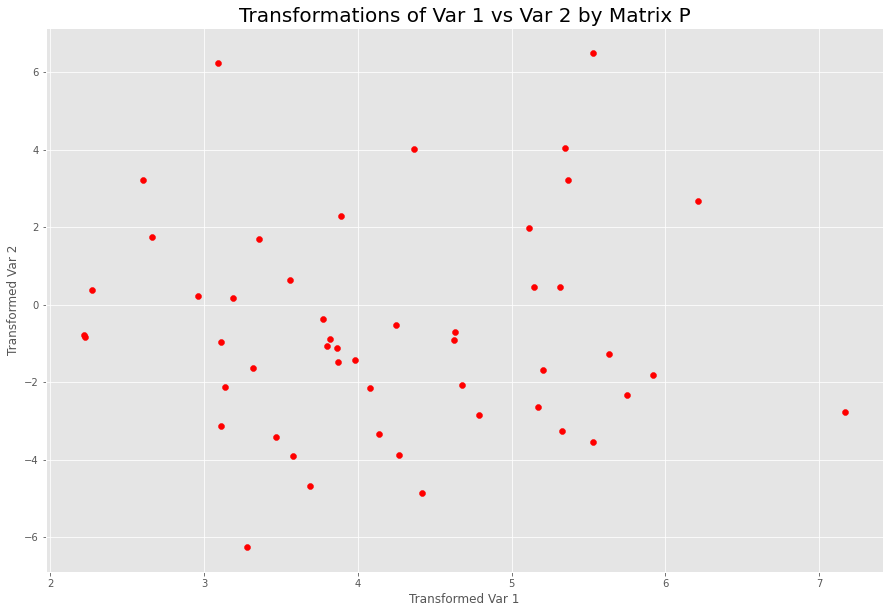

In [824]:
#Plotting 
plt.title('Transformations of Var 1 vs Var 2 by Matrix P', fontdict = {'size':20,'color':'black'})
plt.scatter(sample_trans[:,0],sample_trans[:,1],color= 'r')

#label the axes
plt.xlabel('Transformed Var 1')
plt.ylabel('Transformed Var 2')

plt.show()

In [825]:
#Calculating the sample mean and sample covariance
sample_trans_means = np.mean(sample_trans, axis=0) #axis = 0 to operate correctly
sample_trans_cov = np.cov(sample_trans.T) #Transpose of sample to operate correctly

print('Sample Transformed means')
print(sample_trans_means)
print('---------')
print('')
print('Sample Transformed Covariance')
print(sample_trans_cov)

Sample Transformed means
[ 4.19559747 -0.69712457]
---------

Sample Transformed Covariance
[[ 1.27024656 -0.        ]
 [-0.          7.50062848]]


D is now our covariance matrix for this transformed sample, as such, any transformation by a Matrix such as P can be used to influence the variances from the mean for a data set.

##### (d) Summarise and Critique

The larger the sample size (n) the more accurately the sample will represent the population. Thus you will get more accurate results for both sample mean and covariance as well as more accurate results for all the other aspects more generally.

The choice of mu impacts the peak of our distribution on our plots (i.e. where most data occurs as you expect with any normal distribution, including multivariates).

The choice of covariance (Sigma) impacts the spread of this data (and thus how flat or tall our distribution is) as it impacts our deviations from the mean.

## 2 Regression by Matrix Operations

#### (1) Matrix Procedure

In [826]:
#Setting the values of Matrix X and Vector y
X = np.array([[1,0],
              [1,3],
              [1,6]])

y = np.array([1,4,5])
y.shape = (3,1) #set y to be a column vector explicitly

In [827]:
#Calculate XᵀX
XᵀX = X.T@X
print(XᵀX)

[[ 3  9]
 [ 9 45]]


In [828]:
#Calculate the inverse of the above
XᵀX_inv = np.linalg.inv(XᵀX)
print(XᵀX_inv)

[[ 0.83333333 -0.16666667]
 [-0.16666667  0.05555556]]


In [829]:
#Calculate Xᵀy
Xᵀy = X.T@y
print(Xᵀy)

[[10]
 [42]]


In [830]:
# Calculate (XᵀX)⁻¹Xᵀy
β = XᵀX_inv@Xᵀy
print(β)

[[1.33333333]
 [0.66666667]]


In [831]:
#Finally calculate Xβ
Xβ = X@β
print(Xβ)

[[1.33333333]
 [3.33333333]
 [5.33333333]]


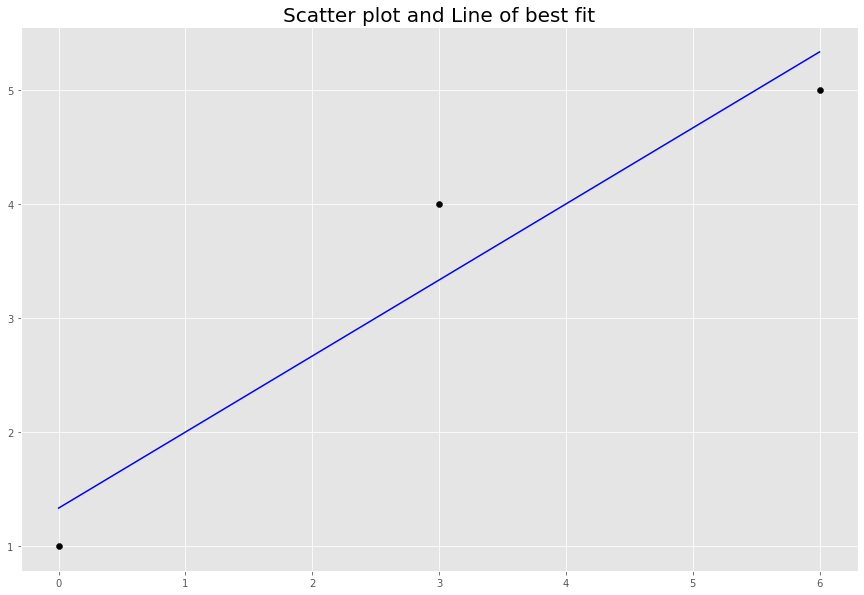

In [832]:
#Scatter plot the points and the line of best fit
plt.title('Scatter plot and Line of best fit', fontdict = {'size':20,'color':'black'})
plt.scatter(X[:,1],y,c='black')
plt.plot(X[:,1],Xβ, '-b')
plt.show()

In [833]:
#Calculate the residuals
Residuals = y - Xβ
print(Residuals)

[[-0.33333333]
 [ 0.66666667]
 [-0.33333333]]


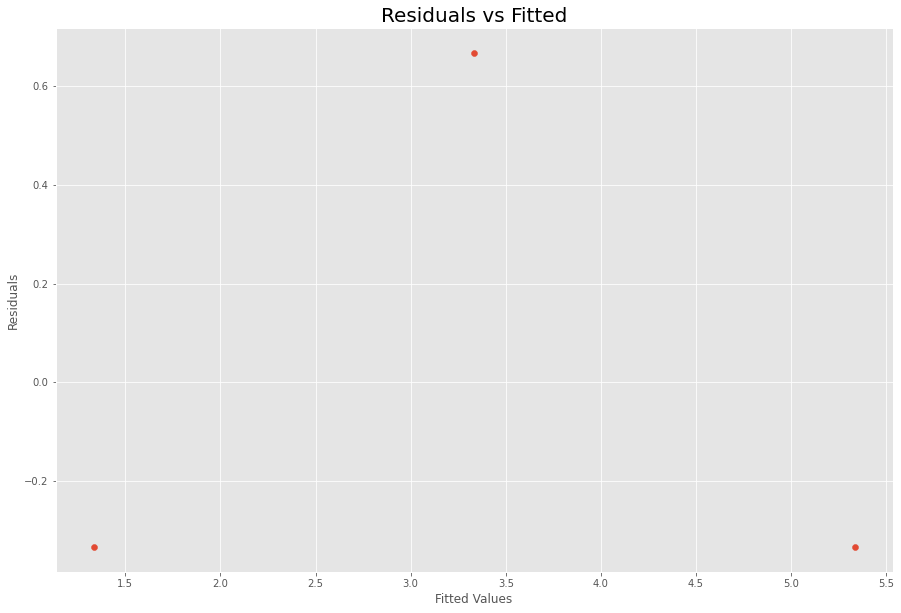

In [834]:
plt.title('Residuals vs Fitted', fontdict = {'size':20,'color':'black'})
plt.scatter(Xβ, Residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [835]:
#Calculating the R² value being:
#One minus the sum of the squares of the residuals
#Divided by the total sum of squares

#Calculate the mean for the total sum of squares
ymean = np.sum(y)/y.size


y_calc = []
for i in range(y.size):
    y_add = np.float64(y[i]-ymean)
    y_calc.append(y_add)


#Sum of Squares Total
y_calc = np.array(y_calc)
SST = np.sum(y_calc**2)
print('Total Sum of Squares: ', SST)
    
#Calculate the sum of the square of the residuals
SSR = np.sum(Residuals**2)
print('Sum of Squares of the Residuals: ',SSR)

#Calculate the R² Value
RSq = 1- SSR/SST
print('Total R² Value: ',RSq)

Total Sum of Squares:  8.666666666666668
Sum of Squares of the Residuals:  0.6666666666666666
Total R² Value:  0.9230769230769231


Comparing results to np.polyfit() below, we can see that the results are the same (albeit in an inverted format) giving us the same line of best fit.

In [836]:
#Amending format of Arrays to allow for correct interaction with polyfit
X_Col = X[:,1]
print(X_Col)
y_Col = y[:,0]
print(y_Col)

coeff = np.polyfit(X_Col,y_Col,1)
print('Polyfit result: ',coeff)
print('Matrix operation result: ',β)


[0 3 6]
[1 4 5]
Polyfit result:  [0.66666667 1.33333333]
Matrix operation result:  [[1.33333333]
 [0.66666667]]


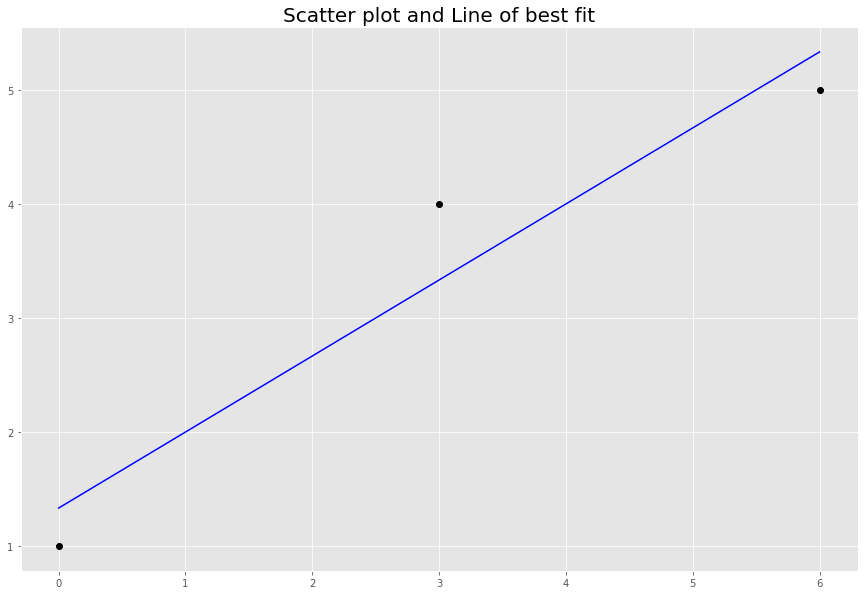

In [837]:
#produce a plot as previously for comparison
plt.title('Scatter plot and Line of best fit', fontdict = {'size':20,'color':'black'})
poly1d_fn = np.poly1d(coeff)
plt.plot(X_Col,y, 'ko', X_Col, poly1d_fn(X_Col),'-b')
plt.show()

#### (2) Amended for Quadratic Case

In [838]:
#Assigning X_2 as the new extended version of X in the example
X_2 = np.array([[1,0,0],
                [1,3,9],
                [1,6,36]])

#y can be amended to any values to produce results and thus be applied to a general case
y = np.array([1,4,5])
y.shape = (3,1) #set y to be a column vector explicitly

In [839]:
#Calculate XᵀX
X_2ᵀX_2 = X_2.T@X_2
print(X_2ᵀX_2)

[[   3    9   45]
 [   9   45  243]
 [  45  243 1377]]


In [840]:
#Calculate the inverse of the above
X_2ᵀX_2_inv = np.linalg.inv(X_2ᵀX_2)
print(X_2ᵀX_2_inv)

[[ 1.         -0.5         0.05555556]
 [-0.5         0.72222222 -0.11111111]
 [ 0.05555556 -0.11111111  0.01851852]]


In [841]:
#Calculate Xᵀy
X_2ᵀy = X_2.T@y
print(X_2ᵀy)

[[ 10]
 [ 42]
 [216]]


In [842]:
# Calculate (XᵀX)⁻¹Xᵀy
β = X_2ᵀX_2_inv@X_2ᵀy
print(β)

[[ 1.        ]
 [ 1.33333333]
 [-0.11111111]]


In [843]:
X_2_Col = X_2[:,1]
print(X_2_Col)

[0 3 6]


As previously, the results from np.polyfit() match but are in an inverted format

In [844]:
np.polyfit(X_2_Col,y_Col,2)

array([-0.11111111,  1.33333333,  1.        ])

Unsure if the below is what was intended, but a function with input of vector y is defined below. Outputting the Quadratic best fit values and the calculated fitted values.

In [845]:
n = 3   # obs
j = 3   # order

a = np.zeros(shape=(n,j)) # n = observations, j = order of polynomial

In [846]:
#Create the X matrix for n observations and of order j (as above)
for i in range(n):
    for k in range (j):
        a[i][k] = 1
        a[i][k] = i*3
        a[i][k] = (i*3)**k

In [847]:
print(a)

[[ 1.  0.  0.]
 [ 1.  3.  9.]
 [ 1.  6. 36.]]


In [848]:
#Function to execute the procedure above for some input vector, y
def Quadratic_Reg(y,a):
    X = a # previously defined matrix
    
    XᵀX = X.T@X
    
    XᵀX_inv = np.linalg.inv(XᵀX)
    
    Xᵀy = X.T@y
    
    β = XᵀX_inv@Xᵀy
    
    Fitted_Vals = X@β
    
    return β, Fitted_Vals
    

In [849]:
#Testing the function and
Quadratic_Reg(y,a)

(array([[ 1.        ],
        [ 1.33333333],
        [-0.11111111]]),
 array([[1.],
        [4.],
        [5.]]))

#### (3) Length of Day Analysis

##### (a) Important the data set and assembling as required

In [850]:
#Importing Data via Pandas for ease
import pandas as pd
data = pd.read_csv('DayLength.csv')

In [851]:
#Checking import completed correctly
data.tail()

,Day,Day length
419,"Thu, Feb 24",10:36:04
420,"Fri, Feb 25",10:40:03
421,"Sat, Feb 26",10:44:05
422,"Sun, Feb 27",10:48:07
423,"Mon, Feb 28",10:52:09


In [852]:
#creating the daylength array and converting the timestamps into seconds
dl = []

for i in range(data.shape[0]):
    dl.append(int(data['Day length'][i].split(":")[0])*3600 + 
              int(data['Day length'][i].split(":")[1])*60 + 
              int(data['Day length'][i].split(":")[2]))
   
#Converting into an Array for use
dl = np.array(dl)

##### (b)(1) Quadratic Fit

In [853]:
#setting n (the number of observations) to the size of dl
n = dl.size
j = 3 # starting with a quadratic fit
a = np.zeros(shape=(n,j)) # n = observations, j = order of polynomial

In [854]:
#Reusing previous code to create the matrix required for X
for i in range(n):
    for k in range (j):
        a[i][k] = 1
        a[i][k] = i*3
        a[i][k] = (i*3)**k

print(a)

[[      1.       0.       0.]
 [      1.       3.       9.]
 [      1.       6.      36.]
 ...
 [      1.    1263. 1595169.]
 [      1.    1266. 1602756.]
 [      1.    1269. 1610361.]]


In [855]:
#Testing output of previous function works, but need to store outputs for plotting etc
#so creating manually as well

#Quadratic_Reg(dl,a)

In [856]:
X = a # previously defined matrix
y = dl

XᵀX = X.T@X
XᵀX_inv = np.linalg.inv(XᵀX)
Xᵀy = X.T@y
β = XᵀX_inv@Xᵀy

print('Equation defined by: ',β)
print('y = ',β[0],'+',β[1],'x ',β[2],'x²')

Fitted_Vals_2 = X@β

Equation defined by:  [31010.61040096    75.68644189    -0.06732372]
y =  31010.610400962934 + 75.68644188736926 x  -0.06732371961723227 x²


In [857]:
Residuals = y - Fitted_Vals_2

In [858]:
#Calculating the R² value being:
#One minus the sum of the squares of the residuals
#Divided by the total sum of squares

#Calculate the mean for the total sum of squares
ymean = np.sum(y)/y.size


y_calc = []
for i in range(y.size):
    y_add = np.float64(y[i]-ymean)
    y_calc.append(y_add)


#Sum of Squares Total
y_calc = np.array(y_calc)
SST = np.sum(y_calc**2)
print('Total Sum of Squares: ', SST)
    
#Calculate the sum of the square of the residuals
SSR = np.sum(Residuals**2)
print('Sum of Squares of the Residuals: ',SSR)

#Calculate the R² Value
RSq = 1- SSR/SST
print('Total R² Value: ',RSq)

Total Sum of Squares:  53135960724.64151
Sum of Squares of the Residuals:  19755352028.670387
Total R² Value:  0.628211257324478


##### (b)(2) Cubic Fit

In [859]:
#setting n (the number of observations) to the size of dl
n = dl.size
j = 4 # Cubic fit
a = np.zeros(shape=(n,j)) # n = observations, j = order of polynomial

In [860]:
#Reusing previous code to create the matrix required for X
for i in range(n):
    for k in range (j):
        a[i][k] = 1
        a[i][k] = i*3
        a[i][k] = (i*3)**k

print(a)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02]
 ...
 [1.00000000e+00 1.26300000e+03 1.59516900e+06 2.01469845e+09]
 [1.00000000e+00 1.26600000e+03 1.60275600e+06 2.02908910e+09]
 [1.00000000e+00 1.26900000e+03 1.61036100e+06 2.04354811e+09]]


In [861]:
X = a # previously defined matrix
y = dl

XᵀX = X.T@X
XᵀX_inv = np.linalg.inv(XᵀX)
Xᵀy = X.T@y
β = XᵀX_inv@Xᵀy

print('Equation defined by: ',β)
print('y = ',β[0],'+',β[1],'x ',β[2],'x² +', β[3],'x³')

Fitted_Vals_3 = X@β

Equation defined by:  [16276.53970649   215.84374011    -0.34376758     0.00014523]
y =  16276.539706490235 + 215.84374010955617 x  -0.3437675792021615 x² + 0.00014522924065402468 x³


In [862]:
Residuals = y - Fitted_Vals_3

In [863]:
#Calculating the R² value being:
#One minus the sum of the squares of the residuals
#Divided by the total sum of squares

#Calculate the mean for the total sum of squares
ymean = np.sum(y)/y.size


y_calc = []
for i in range(y.size):
    y_add = np.float64(y[i]-ymean)
    y_calc.append(y_add)


#Sum of Squares Total
y_calc = np.array(y_calc)
SST = np.sum(y_calc**2)
print('Total Sum of Squares: ', SST)
    
#Calculate the sum of the square of the residuals
SSR = np.sum(Residuals**2)
print('Sum of Squares of the Residuals: ',SSR)

#Calculate the R² Value
RSq = 1- SSR/SST
print('Total R² Value: ',RSq)

Total Sum of Squares:  53135960724.64151
Sum of Squares of the Residuals:  6228248772.033953
Total R² Value:  0.88278655947693


##### (b)(3) Quartic Fit

In [864]:
#setting n (the number of observations) to the size of dl
n = dl.size
j = 5 # Quartic fit
a = np.zeros(shape=(n,j)) # n = observations, j = order of polynomial

In [865]:
#Reusing previous code to create the matrix required for X
for i in range(n):
    for k in range (j):
        a[i][k] = 1
        a[i][k] = i*3
        a[i][k] = (i*3)**k

print(a)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03]
 ...
 [1.00000000e+00 1.26300000e+03 1.59516900e+06 2.01469845e+09
  2.54456414e+12]
 [1.00000000e+00 1.26600000e+03 1.60275600e+06 2.02908910e+09
  2.56882680e+12]
 [1.00000000e+00 1.26900000e+03 1.61036100e+06 2.04354811e+09
  2.59326255e+12]]


In [866]:
X = a # previously defined matrix
y = dl

XᵀX = X.T@X
XᵀX_inv = np.linalg.inv(XᵀX)
Xᵀy = X.T@y
β = XᵀX_inv@Xᵀy

print('Equation defined by: ',β)
print('y = ',β[0],'+',β[1],'x +',β[2],'x²', β[3],'x³ +', β[4], 'x⁴')

Fitted_Vals_4 = X@β

Equation defined by:  [26945.52743995    45.88944077     0.26056878    -0.00059616
     0.00000029]
y =  26945.527439949103 + 45.88944077477208 x + 0.26056878426732055 x² -0.0005961555120913009 x³ + 2.921137717671842e-07 x⁴


In [867]:
Residuals = y - Fitted_Vals_4

In [868]:
#Calculating the R² value being:
#One minus the sum of the squares of the residuals
#Divided by the total sum of squares

#Calculate the mean for the total sum of squares
ymean = np.sum(y)/y.size


y_calc = []
for i in range(y.size):
    y_add = np.float64(y[i]-ymean)
    y_calc.append(y_add)


#Sum of Squares Total
y_calc = np.array(y_calc)
SST = np.sum(y_calc**2)
print('Total Sum of Squares: ', SST)
    
#Calculate the sum of the square of the residuals
SSR = np.sum(Residuals**2)
print('Sum of Squares of the Residuals: ',SSR)

#Calculate the R² Value
RSq = 1- SSR/SST
print('Total R² Value: ',RSq)

Total Sum of Squares:  53135960724.64151
Sum of Squares of the Residuals:  606703048.9922811
Total R² Value:  0.9885820630563865


##### (b) Plot and Compare

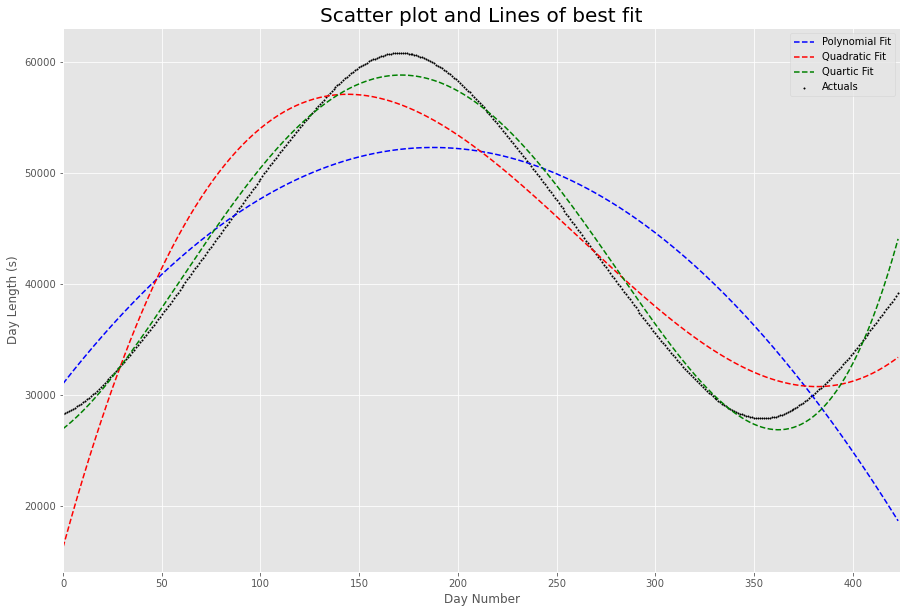

In [869]:
#Plots of the different fits next to each other with a legend

#add a title
plt.title('Scatter plot and Lines of best fit', fontdict = {'size':20,'color':'black'})

#plot the actuals and fits
plt.scatter(X[:,1]/3,y,c='black',s=2,label='Actuals')
plt.plot(X[:,1]/3,Fitted_Vals_2, '--b',label='Polynomial Fit')
plt.plot(X[:,1]/3,Fitted_Vals_3, '--r',label='Quadratic Fit')
plt.plot(X[:,1]/3,Fitted_Vals_4, '--g',label='Quartic Fit')

#label the axes
plt.xlabel('Day Number')
plt.ylabel('Day Length (s)')

plt.xlim([0,424]) #limit the x-range as it was extended too far
plt.legend() #add a legend
plt.show()

In [870]:
#Produce the fits using np.polyfit and printing the results
coeff_2 = np.polyfit(X[:,1]/3,dl,2)
coeff_3 = np.polyfit(X[:,1]/3,dl,3)
coeff_4 = np.polyfit(X[:,1]/3,dl,4)
print('Polyfit result: ',coeff_2)
print('Quadfit result: ',coeff_3)
print('Quartfit result: ',coeff_4)



Polyfit result:  [   -0.60591348   227.05932566 31010.61040096]
Quadfit result:  [    0.00392119    -3.09390821   647.53122033 16276.53970649]
Quartfit result:  [    0.00002366    -0.0160962      2.34511906   137.66832233
 26945.52743972]


We can see again that these match to the ones we calculated with the matrix operations. Plotting again below for easier comparison of the two.

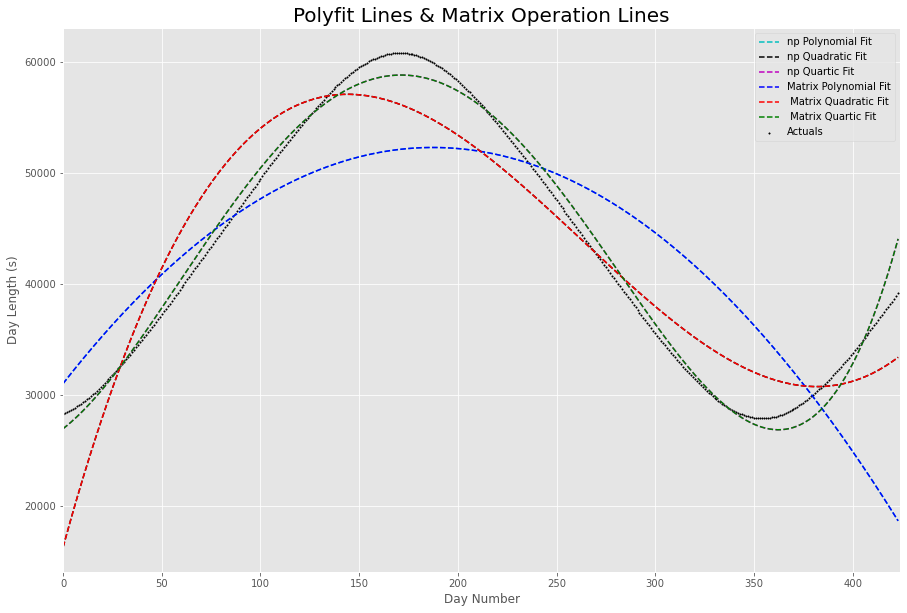

In [871]:
plt.title('Polyfit Lines & Matrix Operation Lines', fontdict = {'size':20,'color':'black'})
poly1d_fn_2 = np.poly1d(coeff_2)
poly1d_fn_3 = np.poly1d(coeff_3)
poly1d_fn_4 = np.poly1d(coeff_4)

#Plotting the Actuals
plt.scatter(X[:,1]/3,y,c='black',s=2,label='Actuals')

#Plotting the polyfit lines
plt.plot(poly1d_fn_2(X[:,1]/3),'--c', label='np Polynomial Fit')
plt.plot(poly1d_fn_3(X[:,1]/3),'--k', label='np Quadratic Fit')
plt.plot(poly1d_fn_4(X[:,1]/3),'--m', label='np Quartic Fit')

#Plotting the Matrix Operation Lines
plt.plot(X[:,1]/3,Fitted_Vals_2, '--b',label='Matrix Polynomial Fit')
plt.plot(X[:,1]/3,Fitted_Vals_3, '--r',label=' Matrix Quadratic Fit')
plt.plot(X[:,1]/3,Fitted_Vals_4, '--g',label=' Matrix Quartic Fit')


#label the axes
plt.xlabel('Day Number')
plt.ylabel('Day Length (s)')

plt.xlim([0,424]) #limit the x-range as it was extended too far
plt.legend() #add a legend
plt.show()

We can see from the plot that the lines perfectly intersec, and thus the outputs are clearly the same.

##### (c) Model improvements

Given the nature of the data, there is likely some element of seasonality in the data, this could be included in the models to provide better accuracy. Especially when coupled with increased data points (i.e. by analysing the data over a longer time period). However, the length of our current set may actually be less useful than if we had it shortened, again, knowing that duration of daylight is seasonal it would be more sensible to use a 365 day (1 cycle) period to analyse the data.

Looking briefly at the plot above and the actuals, if we were to restrict it to a 365 day period, we can see that the plot actually looks almost normally distributed, but our inclusion of the extra days is skewing this perception and introducing higher orders for a "better" fit that would not be needed if it were restricted or seasonality taken into account over a longer period.

Given the distribution looks normal over this period, we may also want to use this method for analysis instead of the one we have used if we were to attempt to produce a better fitting model.

### References
Stack Overflow. (n.d.). How to create random orthonormal matrix in python numpy. [online] Available at: https://stackoverflow.com/questions/38426349/how-to-create-random-orthonormal-matrix-in-python-numpy [Accessed 24 Mar. 2022].

www.w3schools.com. (n.d.). NumPy Joining Array. [online] Available at: https://www.w3schools.com/python/numpy/numpy_array_join.asp [Accessed 26 Mar. 2022].